<a href="https://colab.research.google.com/github/crocha12/Teoria/blob/main/TP/relatorioTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relatorio Tecnico TP**

## Introdução

A máquina de Turing é uma ideia criada por Alan Turing em 1936. Ela é uma máquina teórica que manipula símbolos em uma fita para resolver problemas. Essa máquina é importante para entender como é o funcionamento de um computador. A máquina de Turing padrão é composta por uma fita infinita que contém células que podem armazenar um símbolo cada, existe também um cabeçote que pode fazer leitura e escrita sobre as células movendo-se para esquerda ou direita sobre a fita. De forma similar aos Autômatos a maquina de Turing também possui um diagrama de estados, o qual define as regras do comportamento do cabeçote de acordo com estado, seja ele escrita, leitura e alteração no movimento.

## Projeto e Implementação do Algoritmo

O algoritmo foi projetado com base nos automatos desenvolvidos anteriormente na disciplina de LFA, diferente do AP que tinha uma pilha onde apenas empilhamos e desempilhamos simbolos, a maquina de turing possui uma fita onde é possivel ler e escrever sobre a palavra. Inicialmente no codigo fazemos um iteração sobre a lista de palavras que iremos verificar dentro de um for que para cada palavra $ w $ iremos rodar o algoritmo para resolver a maquina de turing. Inicialmente criamos um array E que contem uma instancia de StateStrip, que possui registrado o estado atual, uma fita e a posição do cabeçote. No não determinismo aplicado no algoritmo iremos criar diversas instâncias do StateStrip em outras etapas do codigo. Continuando, iremos criar uma variavel end que irá controlar o laço de execução do algoritmo. Dentro do laço teremos outro laço que itera sobre E onde para cada $ e $ em $ E $, iremos aplicar a função updateStatesList e guardar esse valor em outro array chamado Next, que irá receber todas as instâncias do StateStrip atualizadas. na função updateStateList inicialmente verificamos todas as transições possiveis para o estado atual do $ e $ e o simbolo contido na posição atual da fita, para cada uma das transições encontradas iremos fazer uma instância do StateStrip com o estado novo e com suas devidas alterações na fita e posição do cabeçote, no fim é retornado o array Next. Voltando para o ciclo principal o array $ E $ pegara os dados do Next, e em seguida é feita a verificação se algum dos StateStrip do $ E $ é final, caso sim, saimos do loop e retornamos $ S $, caso não o repetimos o ciclo até encontrar um StateStrip final ou a lista $ E $ ser vazia, caso vazio retornamos $ N $.

## Metodologia:

Para desenvolver este algoritmo foi utilizado como base o último algorítimo desenvolvido na disciplina de LFA, que é um automato de pilha não determinístico, o algoritmo anterior foi desenvolvido com uma alta quantidade de testes e criado com a metodologia de TDD, sempre buscando deixar o código mais limpo possível(clean code). Partindo do código anterior, a classe StateStack foi substituída por StateStrip que possui os atributos: code(estado atual da máquina), strip(fita), pos(posição do cabeçote sobre a fita) e isFinal(determina se a maquina está em um estado final e sem transições possíveis), além disso, também foi alterada a classe Transition, que dessa vez possui os campos current, symbol, next, writeSymbol e direction. Na função updateStateStrip foram feitas atualizações para substituir a lógica de empilhamento e desempilhamento na pilha, por leitura/escrita na fita e alteração da direção do cabeçote. O algoritmo foi testado com o exemplo da atividade e o exemplo disponibilizado no video que apresentava a MTND.

## Resultados e Conclusões:

Para analisar o tempo de execução serão feitos testes para as linguagens $ L $ = { $ a^nb^n $ | n > 0 } onde iremos variar o valor de n entre 1 e 100 onde o tamanho da palavra representa $2*n$ para $L$.

Gerando as lista de palavras

In [5]:
n = 100
W = []
for i in range(n):
  p = 'a'*(i+1) + 'b'*(i+1)
  W.append(p)

Foram feitas modificações no algoritmo original para poder registrar o seu tempo e além disso adicionamos a lib time

In [2]:
import time

In [6]:
class StateStrip:
  def __init__(self, code, strip, pos):
    self.code = code
    self.strip = strip
    self.pos = pos
    self.isFinal = False

class Transition:
  def __init__(self, current, symbol, next, writeSymbol, direction):
    self.current = current
    self.symbol = symbol
    self.next = next
    self.writeSymbol = writeSymbol
    self.direction = direction

def checkTransition(current, symbol):
  return list(filter(lambda x: x.current == current and x.symbol == symbol, Transitions))

def printarArrayState(a):
  print('ArrayState')
  for i in a:
    print('    ', i.code, i.strip, i.pos)
  print('end')

def printTransition(tr, state):
  print('Transitions para', state.code, state.strip)
  for t in tr:
    print('    ',t.next, t.writeSymbol, t.direction)
  print('end')

def updateStatesList(e, E):
  tr = checkTransition(e.code, e.strip[e.pos])
  for t in tr:
    state = StateStrip(t.next, e.strip.copy(), e.pos)
    if e.strip[e.pos] == '*':
      state.strip.append('*')
    state.strip[state.pos] = t.writeSymbol
    if t.direction == 'D':
      state.pos = state.pos + 1
    elif t.direction == 'E':
      state.pos = state.pos - 1
    if state.code in endStates and len(checkTransition(state.code, state.strip[state.pos])) == 0:
      state.isFinal = True
    E.append(state)
  return E   

def main():
  Times = []
  for w in wordsList:
    ini = time.time()
    E = [StateStrip(initialState, list(limit + w + blank), 1)]
    end = False
    status = 'N'
    while not end:
      Next = []
      while len(E) > 0:
        e = E.pop()
        Next = updateStatesList(e, Next)
      E = Next
      for e in E:
        if e.isFinal:
          status = 'S'
          end = True
      if len(E) == 0:
        end = True
    #print(status)
    end = time.time()
    Times.append(end - ini)
  return Times

$ L_ =  \{a^nb^n | n >= 0\} $

In [13]:
statesList = ['0', '1', '2', '3', '4']
alphabet = ['a', 'b']
stripAlphabet = ['A', 'B', '*']
limit = '<'
blank = '*'
n = 10
Transitions = [
    Transition('0', 'a', '1', 'A', 'D'),
    Transition('1', 'a', '1', 'a', 'D'),
    Transition('1', 'B', '1', 'B', 'D'),
    Transition('1', 'b', '2', 'B', 'E'),
    Transition('2', 'B', '2', 'B', 'E'),
    Transition('2', 'a', '2', 'a', 'E'),
    Transition('2', 'A', '0', 'A', 'D'),
    Transition('0', 'B', '3', 'B', 'D'),
    Transition('3', 'B', '3', 'B', 'D'),
    Transition('3', '*', '4', '*', 'E'),
]

initialState = '0'
endStates = ['4']

wordsList = W

T = main()

Para fazer uma regressão linear utilizaremos a lib sklearn e, além disso, usaremos a lib pyplot para plotar os gráficos e numpy para trabalharmos de forma melhor com os arrays.

y = 0.0009435202100417869x + -0.01698575612270472
ou
tempo = 0.0009435202100417869n + -0.01698575612270472


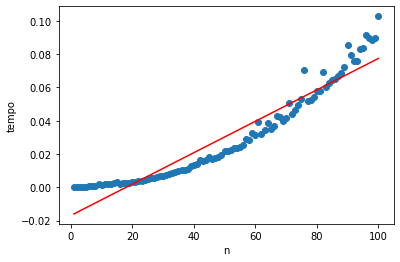

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
x = np.array(list(zip(range(1,101))))
y = np.array(T)
lr.fit(x,y)
plt.xlabel('n')
plt.ylabel('tempo')
plt.scatter(x, T)
plt.plot(x, lr.predict(x), color='red')
a = lr.coef_[0]
b= lr.intercept_
print("y = {}x + {}".format(a, b))
print("ou")
print("tempo = {}n + {}".format(a, b))